# 정확도 Accuracy
- 실제 데이터에서 예측 데이터가 얼마나 같은지 판단
- 직관적인 모델 예측 성능 > 성능 왜곡 되기도

In [12]:
from sklearn.base import BaseEstimator
import numpy as np

# 분류기1
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None) :
        pass

    def predict(self, X) :
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]) :   # sex ==1, survived =0 예측 / 아니면 1로 예측
            if X['Sex'].iloc[i] == 1 :
                pred[i] = 0
            else :
                pred[i] = 1

        return pred

In [13]:
from sklearn.preprocessing import LabelEncoder

# 전처리 함수 #

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# data load
titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 전처리
X_titanic_df = transform_features(X_titanic_df)
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15028\773009573.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15028\773009573.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [14]:
# 모델 생성 & 학습
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

In [15]:
# 예측
my_pred = myclf.predict(X_test)

accuracy_score(y_test, my_pred)

0.7877094972067039

### MNIST dataset - 손글씨 데이터 셋
 - 0~9 숫자 이미지 픽셀 정보 -> 기반으로 숫자 digit 예측

In [16]:
from sklearn.datasets import load_digits

# Mnist dataset
digits = load_digits()
digits.data.shape  


(1797, 64)

- p.149 MyFakeClassifier 이용한 정확도 측정

# 오차행렬

### 정확도 
- 전체 맞춘 비율 = TP + TN / 전체

In [21]:
from sklearn.metrics import confusion_matrix

# 예측기준 맞춘것 / 틀린것
confusion_matrix(y_test, my_pred)  # row: 실제값 / col: 예측

array([[92, 18],
       [20, 49]])

### 정밀도, 재현율
- 정밀도: 예측 양성 기준 정답율 = TP / TP + FP
- 재현율: 실제 양성 기준 정답율 = TP / TP + FN

In [23]:
from sklearn.metrics import precision_score, recall_score

# 정밀도(예측 중 실제 양성 비율)    # 재현율(실제 중 실제 양성 비율)
precision_score(y_test, my_pred) ,recall_score(y_test, my_pred)

(0.7313432835820896, 0.7101449275362319)

In [26]:
# 전처리 
#X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [27]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuarcy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print(confusion)
    print('*'*20)
    print(accuarcy, precision, recall)

In [28]:
# 로지스틱회귀 분류모델 생성
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

## 정확도, 정밀도, 재현율
get_clf_eval(y_test, pred)

[[104  14]
 [ 13  48]]
********************
0.8491620111731844 0.7741935483870968 0.7868852459016393


c:\Users\LG\.conda\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 예측 확률 값

In [31]:
# 예측한 확률값 - 큰 값을 기준으로
pred_proba = lr_clf.predict_proba(X_test)
pred_proba

array([[0.46185748, 0.53814252],
       [0.87867005, 0.12132995],
       [0.87716667, 0.12283333],
       [0.88265168, 0.11734832],
       [0.85511781, 0.14488219],
       [0.88225492, 0.11774508],
       [0.88842072, 0.11157928],
       [0.20875208, 0.79124792],
       [0.7827161 , 0.2172839 ],
       [0.36954029, 0.63045971],
       [0.89982915, 0.10017085],
       [0.87492758, 0.12507242],
       [0.87716068, 0.12283932],
       [0.88837474, 0.11162526],
       [0.43646944, 0.56353056],
       [0.85895827, 0.14104173],
       [0.9036873 , 0.0963127 ],
       [0.7333301 , 0.2666699 ],
       [0.72464827, 0.27535173],
       [0.17177972, 0.82822028],
       [0.75352602, 0.24647398],
       [0.61908396, 0.38091604],
       [0.85459213, 0.14540787],
       [0.81471154, 0.18528846],
       [0.88800342, 0.11199658],
       [0.76544456, 0.23455544],
       [0.85966954, 0.14033046],
       [0.92588022, 0.07411978],
       [0.71949043, 0.28050957],
       [0.69535624, 0.30464376],
       [0.

In [32]:
# 확률 + 예측 값 
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
pred_proba_result

array([[0.46185748, 0.53814252, 1.        ],
       [0.87867005, 0.12132995, 0.        ],
       [0.87716667, 0.12283333, 0.        ],
       [0.88265168, 0.11734832, 0.        ],
       [0.85511781, 0.14488219, 0.        ],
       [0.88225492, 0.11774508, 0.        ],
       [0.88842072, 0.11157928, 0.        ],
       [0.20875208, 0.79124792, 1.        ],
       [0.7827161 , 0.2172839 , 0.        ],
       [0.36954029, 0.63045971, 1.        ],
       [0.89982915, 0.10017085, 0.        ],
       [0.87492758, 0.12507242, 0.        ],
       [0.87716068, 0.12283932, 0.        ],
       [0.88837474, 0.11162526, 0.        ],
       [0.43646944, 0.56353056, 1.        ],
       [0.85895827, 0.14104173, 0.        ],
       [0.9036873 , 0.0963127 , 0.        ],
       [0.7333301 , 0.2666699 , 0.        ],
       [0.72464827, 0.27535173, 0.        ],
       [0.17177972, 0.82822028, 1.        ],
       [0.75352602, 0.24647398, 0.        ],
       [0.61908396, 0.38091604, 0.        ],
       [0.

### 이진화

In [33]:
# 이진화 - 기준 설정
from sklearn.preprocessing import Binarizer

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)  # 새로운 예측값 - 열 하나만 꺼내기(생존)

binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)  # 이진화

custom_predict = binarizer.transform(pred_proba_1)  # 실제 값으로 변환

get_clf_eval(y_test, custom_predict)

[[98 20]
 [10 51]]
********************
0.8324022346368715 0.7183098591549296 0.8360655737704918


### 특이도
- 실제 음성 기준 정답율 = TN / FP + TN

# F1-SCORE
- 정밀도, 재현율의 조화 평균
- 그 모델의 전체적인 성능을 볼때

In [37]:
from sklearn.metrics import f1_score

f1_score(y_test, pred)

0.7804878048780488

# ROC (Receiver Operation Characteristics)
- 민감도 어떻게 달라지는지 보는 지표 (=재현율, 실제 양성을 맞춘 비율)
- 거짓긍정율 = 1 - 특이도
- 좌측 상단, 1에 가까울 수록 > 좋은 모델
- ROC-AUC : ROC 곡선 아래 면적값, 더 클 수록 > 좋은 모델

In [38]:
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
pred_proba_class1

array([0.53814252, 0.12132995, 0.12283333, 0.11734832, 0.14488219,
       0.11774508, 0.11157928, 0.79124792, 0.2172839 , 0.63045971,
       0.10017085, 0.12507242, 0.12283932, 0.11162526, 0.56353056,
       0.14104173, 0.0963127 , 0.2666699 , 0.27535173, 0.82822028,
       0.24647398, 0.38091604, 0.14540787, 0.18528846, 0.11199658,
       0.23455544, 0.14033046, 0.07411978, 0.28050957, 0.30464376,
       0.94727855, 0.81731416, 0.12693095, 0.82611763, 0.39958997,
       0.23455544, 0.07238643, 0.61115551, 0.05297014, 0.10391268,
       0.35090454, 0.08333228, 0.82176313, 0.70789294, 0.63042367,
       0.63043998, 0.91882999, 0.35826298, 0.94891776, 0.11203117,
       0.59290812, 0.11162526, 0.13280787, 0.72549529, 0.30946165,
       0.19685782, 0.22626864, 0.12283438, 0.1542376 , 0.43251721,
       0.28021718, 0.10080806, 0.54558072, 0.51421146, 0.44428341,
       0.09458908, 0.66678417, 0.59406169, 0.9518255 , 0.14816854,
       0.12896962, 0.16849367, 0.10391493, 0.94801441, 0.19866

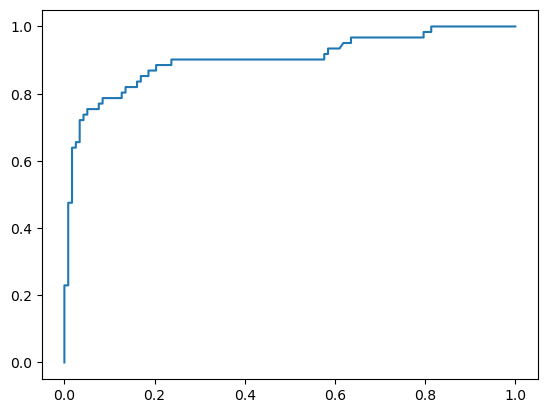

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 시각화
plt.plot(fprs, tprs, label='ROC')

### ROC-AUC

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, pred_proba_class1)

np.float64(0.9024034454015005)